<a href="https://colab.research.google.com/github/NeerajVeerla/CVworkshop/blob/master/Day2/classificationModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Datasets**

https://archive.ics.uci.edu/ml/datasets.php

##Iris Dataset

In [26]:
from sklearn.datasets import load_iris

In [27]:
data = load_iris()

In [28]:
print(data['DESCR'])


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [29]:
data['data'].shape

(150, 4)

In [30]:
# data['data'][:]
data['target'].shape

(150,)

In [31]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

##MNIST Dataset

In [32]:
from keras.datasets import mnist

In [33]:
# Load MNIST Data
(train_X, train_y), (test_X, test_y) = mnist.load_data()


In [34]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


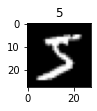

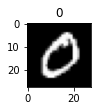

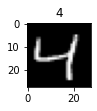

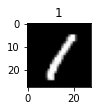

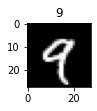

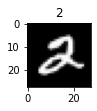

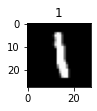

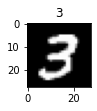

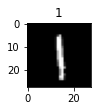

In [35]:
from matplotlib import pyplot

for i in range(9):  
  pyplot.subplot(3,3,i+1)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.title(train_y[i])
  pyplot.show()

#**K Nearest Classifier**

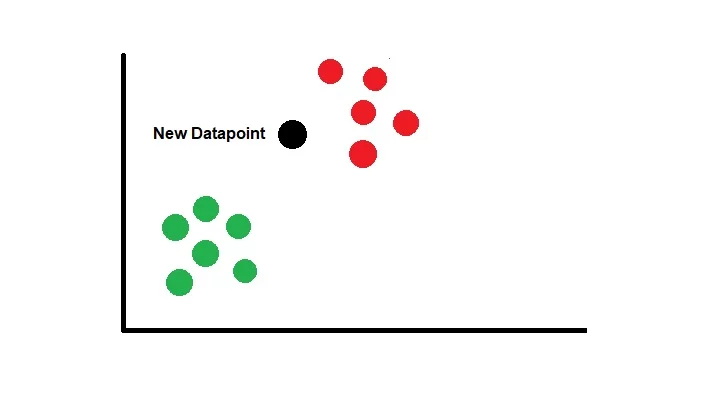

Step-1: Select the number K of the neighbors

Step-2: Calculate the Euclidean distance of K number of neighbors

Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.

Step-4: Among these k neighbors, count the number of the data points in each category.

Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.


In [36]:
#Importing the required modules
import numpy as np
from scipy.stats import mode
 
#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
 
#Function to calculate KNN
def predict(x_train, y , x_input, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in x_input: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

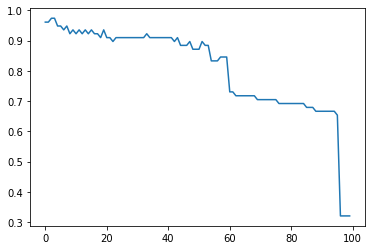

In [37]:
#Importing the required modules
#Importing required modules
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.datasets import load_iris
from numpy.random import randint
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(0)

#Loading the Data
iris= load_iris()
 
# Store features matrix in X
X= iris.data
#Store target vector in 
y= iris.target
 
 
#Creating the training Data
train_idx =randint(0,150,100)
X_train = X[train_idx]
y_train = y[train_idx]
 
#Creating the testing Data
test_idx = numpy.setdiff1d(range(150),train_idx)
X_test = X[test_idx]
y_test = y[test_idx]


acc_li=[]
for k in range(100):
  #Applying our function 
  y_pred = predict(X_train,y_train,X_test , k+1)
  
  #Checking the accuracy
  accuracy_score(y_test, y_pred)
  acc_li.append(accuracy_score(y_test, y_pred))
plt.plot(acc_li)

In [38]:
acc_li

[0.9615384615384616,
 0.9615384615384616,
 0.9743589743589743,
 0.9743589743589743,
 0.9487179487179487,
 0.9487179487179487,
 0.9358974358974359,
 0.9487179487179487,
 0.9230769230769231,
 0.9358974358974359,
 0.9230769230769231,
 0.9358974358974359,
 0.9230769230769231,
 0.9358974358974359,
 0.9230769230769231,
 0.9358974358974359,
 0.9230769230769231,
 0.9230769230769231,
 0.9102564102564102,
 0.9358974358974359,
 0.9102564102564102,
 0.9102564102564102,
 0.8974358974358975,
 0.9102564102564102,
 0.9102564102564102,
 0.9102564102564102,
 0.9102564102564102,
 0.9102564102564102,
 0.9102564102564102,
 0.9102564102564102,
 0.9102564102564102,
 0.9102564102564102,
 0.9102564102564102,
 0.9230769230769231,
 0.9102564102564102,
 0.9102564102564102,
 0.9102564102564102,
 0.9102564102564102,
 0.9102564102564102,
 0.9102564102564102,
 0.9102564102564102,
 0.9102564102564102,
 0.8974358974358975,
 0.9102564102564102,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8974358974

In [39]:
print(len(test_idx))

78


## **KNN: distance metrics**

1. Euclidean distance (p=2)

2. Manhattan distance (p=1) 

3. Minkowski distance

4. Hamming distance

# **Scikit Learn Intro**

1. Load dataset

2. preprocess data

3. Instantiate estimator

4. Fit

5. predict/evaluate

In [40]:
## load the iris data into a DataFrame
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data' 
## Specifying column names.
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [41]:
iris_class = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris['species_num'] = [iris_class[i] for i in iris.species]

In [42]:
## Create an 'X' matrix by dropping the irrelevant columns.
X = iris.drop(['species', 'species_num'], axis=1)
y = iris.species_num

In [43]:
from sklearn.model_selection import train_test_split
## Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.33)

In [50]:
from sklearn.metrics import precision_score

KNN, Linear Classifier, SVM, MLP Classifier

# KNN

In [44]:
# Load dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.33)

# pre-process data
X_train_mean=np.mean(X_train)
X_train_std=np.std(X_train)

X_train=(X_train-X_train_mean)/X_train_std


# instantiate estimator
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)


# fit
knn.fit(X_train, y_train)


# predict/evaluate
X_test=(X_test-X_train_mean)/X_train_std
knn.score(X_test, y_test)

0.98

# Linear

In [45]:
# Load dataset
# already done, same as above


# pre-process data
# same as above


# instantiate estimator
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))


# fit
reg.fit(X_train, y_train)


# predict/evaluate
reg.score(X_test, y_test)

0.9377675795032778

# SVM

In [46]:
# Load dataset

# pre-process data

# instantiate estimator
from sklearn import svm
clf = svm.SVC()

# fit
clf.fit(X_train, y_train)

# predict/evaluate
pred1=clf.predict(X_test)
clf.score(X_test, y_test)

0.98

In [52]:
# Load dataset

# pre-process data

# instantiate estimator
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=50)

# fit
clf.fit(X_train, y_train)

# predict/evaluate
y_pred1 = clf.predict(X_test)
precision_score(y_test, y_pred1, average='macro')


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.8569023569023568

Analyse results based on different metrics and classifiers.

In [53]:
clf.score(X_test, y_test)

0.84

In [49]:


precision_score(y_test, y_pred, average='macro')

0.8569023569023568